In [20]:
filename='load0b'
filename_vs='load0b'

In [21]:
import math
import numpy as np
import pandas as pd
DATA_DIR = "../data/model data/"
CACHE_DIR = "../data/cache/"
IMAGE_DIR = "../data/images/"
INVERSE_DIR = "../data/Inverse analysis/"
EXCEL_DIR = "../data/excel/"
PKL_DIR = "../data/pkl/"

In [22]:
def convert_txt_to_pkl(filename):
    df = pd.read_table(f'{DATA_DIR}{filename}.txt',header=None)
    df.to_pickle(f'{PKL_DIR}{filename}.pkl')

convert_txt_to_pkl(filename)
convert_txt_to_pkl(filename_vs)

In [23]:
df=pd.read_pickle(f'{PKL_DIR}{filename}.pkl')
df_vs=pd.read_pickle(f'{PKL_DIR}{filename_vs}.pkl')


In [24]:
df.rename(columns={0: 'CenterX'}, inplace=True)
df.rename(columns={1: 'CenterY'}, inplace=True)
df.rename(columns={2: 'CenterZ'}, inplace=True)
df.rename(columns={3: 'r2'}, inplace=True)
df_vs.rename(columns={0: 'CenterX'}, inplace=True)
df_vs.rename(columns={1: 'CenterY'}, inplace=True)
df_vs.rename(columns={2: 'CenterZ'}, inplace=True)
df_vs.rename(columns={3: 'r2'}, inplace=True)

In [25]:
se=pd.Series(df['r2'] ,dtype='float64')
se_vs=pd.Series(df_vs['r2'] ,dtype='float64')
def r2_to_dia(x):
    return float((x**(1/2))*2)
df["dia"]=se.map(r2_to_dia)
df_vs["dia"]=se_vs.map(r2_to_dia)

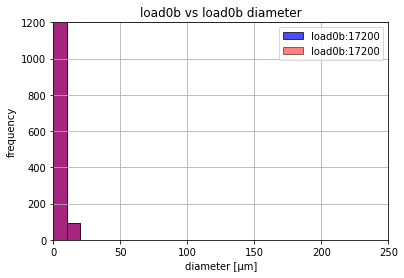

In [26]:
import matplotlib.pyplot as plt
plt.xlim(0, 250)
plt.ylim(0,1200)
df1=pd.Series(df['dia'])
df2=pd.Series(df_vs['dia'])

#plt.hist([df2, df1], bins=20, stacked=None,color = ["red","blue"], label = [f'{filename_vs}',f'{filename}'], alpha=0.6)
n1=sum([1 for _ in open('{}{}.txt'.format(DATA_DIR,filename))])
n2=sum([1 for _ in open('{}{}.txt'.format(DATA_DIR,filename_vs))])
df1.hist(range=[0, 500],bins=50, color = "blue", grid =True, label = f'{filename}:{n1}', alpha=0.7,ec='k')
df2.hist(range=[0, 500],bins=50, color = "red", grid =True, label = f'{filename_vs}:{n2}', alpha=0.5,ec='k')
plt.ylabel('frequency')
plt.xlabel('diameter [μm]')
plt.legend()
plt.title(f'{filename} vs {filename_vs} diameter')
plt.savefig(f'{IMAGE_DIR}{filename}vs{filename_vs}_hist.png',dpi=300)
plt.show()
plt.close()

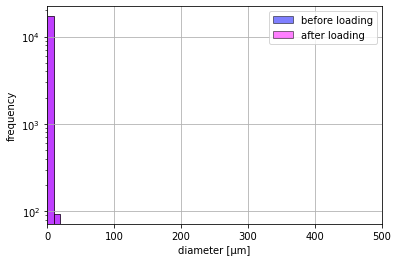

In [27]:
import matplotlib.pyplot as plt
plt.xlim(0, 500)

df1=pd.Series(df['dia'])
df2=pd.Series(df_vs['dia'])

#plt.hist([df2, df1], bins=20, stacked=None,color = ["red","blue"], label = [f'{filename_vs}',f'{filename}'], alpha=0.6)
n1=sum([1 for _ in open('{}{}.txt'.format(DATA_DIR,filename))])
n2=sum([1 for _ in open('{}{}.txt'.format(DATA_DIR,filename_vs))])
df1.hist(range=[0, 500],bins=50, color = "blue", grid =True, label = 'before loading', alpha=0.5,ec='k',log=True)
df2.hist(range=[0, 500],bins=50, color = "magenta", grid =True, label = 'after loading', alpha=0.5,ec='k',log=True)
plt.ylabel('frequency')
plt.xlabel('diameter [μm]')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)
plt.legend()
#plt.title(f'{filename} vs {filename_vs} diameter')
plt.savefig(f'{IMAGE_DIR}{filename}vs{filename_vs}_log_hist.png',dpi=300)
plt.show()
plt.close()

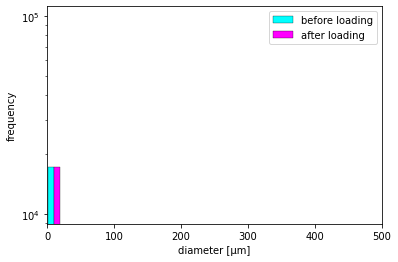

In [28]:
plt.xlim(0, 500)


plt.hist([df1, df2],bins = np.linspace(0, 500, 25),color=["cyan","magenta"] , label=['before loading', 'after loading'],ec='black',linewidth=0.3,log=True)
plt.legend(loc='upper right')
plt.ylabel('frequency')
plt.xlabel('diameter [μm]')
plt.savefig(f'{IMAGE_DIR}{filename}vs{filename_vs}_log_double_hist.png',dpi=300)
plt.show()
plt.close()

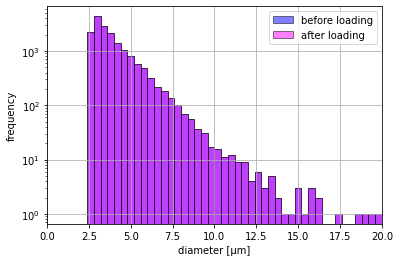

In [30]:
import matplotlib.pyplot as plt
plt.xlim(0, 20)

df1=pd.Series(df['dia'])
df2=pd.Series(df_vs['dia'])

#plt.hist([df2, df1], bins=20, stacked=None,color = ["red","blue"], label = [f'{filename_vs}',f'{filename}'], alpha=0.6)
n1=sum([1 for _ in open('{}{}.txt'.format(DATA_DIR,filename))])
n2=sum([1 for _ in open('{}{}.txt'.format(DATA_DIR,filename_vs))])
df1.hist(range=[0, 20],bins=50, color = "blue", grid =True, label = 'before loading', alpha=0.5,ec='k',log=True)
df2.hist(range=[0, 20],bins=50, color = "magenta", grid =True, label = 'after loading', alpha=0.5,ec='k',log=True)
plt.ylabel('frequency')
plt.xlabel('diameter [μm]')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)
plt.legend()
#plt.title(f'{filename} vs {filename_vs} diameter')
plt.savefig(f'{IMAGE_DIR}{filename}vs{filename_vs}_log_hist.png',dpi=300)
plt.show()
plt.close()